In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/My\ Drive/
root_path = 'gdrive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'Aurélien Géron - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ Concepts, Tools, and Techniques to Build Intelligent Systems-O’Reilly Media (2019).pdf'
'Colab Notebooks'
 David_Carricondo_Resume.pdf
'Documento sin título.gdoc'
 IH_careerpath
 IMG_20190624_004152.jpg
 session.wav
 sketch_data


In [0]:
import os
os.chdir('gdrive/My Drive/')

In [37]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt


Create a function that plots the metrics of the model:


In [0]:
def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

LOAD THE DATASET

In [38]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)

In [6]:
#Look at the data
[print(e) for i,e in enumerate(dataset['test']) if i < 2 ]
  

(<tf.Tensor: shape=(283,), dtype=int64, numpy=
array([ 173,   29,  185,   13,  115, 1956, 8044,    3,  398, 1261, 5497,
        423,    2,   15,   18, 4096, 3958,  637, 2657,  552, 2893, 4926,
       2314, 1673, 4587,  137,   23, 4872, 5345,    2, 7996, 7277, 8004,
       8012,  137,   23,  972, 5346, 5977, 1365, 8051,    2, 7998, 3780,
       1947, 1747, 4411, 3743,    3, 5064, 7961,    7,   13, 2671, 4556,
       3449, 1678,  572, 8037, 7968,    8,  604, 1006, 4002, 2618, 7974,
       7994, 7974, 2893, 2618, 7974, 2475, 3912,    3, 4847, 2034, 2615,
         66, 7974, 3201,    2,    5,   20, 1668, 5475, 7961,    5,   20,
       4474,   20,  119,    6,    1, 2489, 1473, 1960,  323,    3,   12,
       1167, 7968,   21, 4101,   14,  366,  342,   12,  284,  552, 7999,
       4949, 3780, 3779, 3369, 8018,  625, 1979,    2,   78, 1259,    2,
         12,  109, 7968,   21,  129,   12, 4101,  236,   14, 1682,  230,
        392,    7, 4980, 1079, 1678,  572, 8037, 7968,    8, 1712,    9,
    

[None, None]

It seems like the data is already encoded...
Let's split it in training and testing


In [0]:
X_train = dataset['train']
X_test = dataset['test']

But the data comes with the encoder, which I can use for external data as well :)

In [8]:
#Is an encoder with a vocab_size of 8185 words
encoder = info.features['text'].encoder
encoder.vocab_size

8185

Let's try to decode the first two reviews:

In [9]:
for i, e in enumerate(X_train):
  if i < 2:
    print(encoder.decode(e[0]))
  else: break

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [10]:
#Check the values of the first words of the first review
for inrev, rev in enumerate(X_train):
  if inrev==0:
    for inword, word in enumerate(rev[0]):
      if inword<20:
          print(f'{word} -----> {encoder.decode([word])}')
      else: break

62 -----> This 
18 -----> was 
41 -----> an 
604 -----> absolutely 
927 -----> terrible 
65 -----> movie
3 -----> . 
644 -----> Don
7968 -----> '
21 -----> t 
35 -----> be 
5096 -----> lur
36 -----> ed 
11 -----> in 
43 -----> by 
2948 -----> Christopher 
5240 -----> Walke
102 -----> n 
50 -----> or 
681 -----> Michael 


In [11]:
#I wonder if the encoder broadcast to tensor objects:
s = 'Here comes the sun'
s_encoded = encoder.encode(s)
print(type(s_encoded))
print(s_encoded)

<class 'list'>
[2844, 327, 1, 2365]


In [12]:
#Nope, but:
s_tensor = tf.convert_to_tensor(s_encoded)
print(type(s_tensor))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [13]:
#And this would be an input for the model (tuple of tensors or the type (input tensor, 0 tensor))
print((s_tensor, tf.convert_to_tensor(0)))

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([2844,  327,    1, 2365], dtype=int32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


Now, let's prepare the batches of inputs for the model shuffeling and then padding for the last one (adding zeros until the length is equal to the longest review)


In [0]:
BATCH_SIZE = 64

X_train = X_train.shuffle(buffer_size=10000)
X_train = X_train.padded_batch(BATCH_SIZE)

X_test = X_test.padded_batch(BATCH_SIZE)

Now we are ready to run a first model with keras API:

In [0]:
model = tf.keras.Sequential([
    #The embedding layer will have an input dimesion that is the vocabulary size, so the largest integer will not be larger than 8185
    tf.keras.layers.Embedding(input_dim = encoder.vocab_size, output_dim = 64, embeddings_initializer='uniform'),
    #Then we add a Long short-term memory layer with a bidirectional wrapper on it.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), merge_mode='concat'),
    #And then a dense layers
    tf.keras.layers.Dense(64, activation='relu'),
    #And the output dense layer with a linear activation (f(x) = x)
    tf.keras.layers.Dense(1)
])

And compile the model using a Binary corssentropy loss function and we'll update with an Adam optimizer on the accuracy.

In [0]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, epochs=10,
                    validation_data=X_test, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 124s 318ms/step - loss: 0.6623 - accuracy: 0.5424 - val_loss: 0.5721 - val_accuracy: 0.7036
Epoch 2/10
391/391 [==============================] - 121s 310ms/step - loss: 0.4857 - accuracy: 0.7736 - val_loss: 0.3851 - val_accuracy: 0.8464
Epoch 3/10
391/391 [==============================] - 120s 307ms/step - loss: 0.2963 - accuracy: 0.8821 - val_loss: 0.3380 - val_accuracy: 0.8641
Epoch 4/10
391/391 [==============================] - 120s 307ms/step - loss: 0.2364 - accuracy: 0.9112 - val_loss: 0.3389 - val_accuracy: 0.8490
Epoch 5/10
391/391 [==============================] - 122s 312ms/step - loss: 0.2027 - accuracy: 0.9258 - val_loss: 0.3269 - val_accuracy: 0.8615
Epoch 6/10
391/391 [==============================] - 121s 310ms/step - loss: 0.1797 - accuracy: 0.9353 - val_loss: 0.3622 - val_accuracy: 0.8776
Epoch 7/10
391/391 [==============================] - 120s 307ms/step - loss: 0.1583 - accuracy: 0.9448 - val_loss: 0.3635 -

In [19]:
test_loss, test_acc = model.evaluate(X_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 50s 127ms/step - loss: 0.4255 - accuracy: 0.8302
Test Loss: 0.4255288243293762
Test Accuracy: 0.83024001121521


In [0]:
model.save('model_1ltsm.h5')

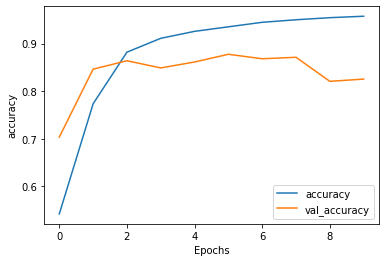

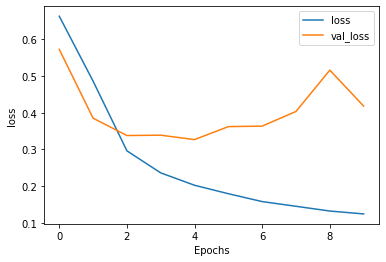

In [37]:
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

Let's check some predictions

In [44]:
#Function to add the padding at the end of the sentences:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec
#Function to get the predictions:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)
  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return (predictions)

In [47]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.5258698]]


In [48]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[2.0119548]]


In [50]:
#Predict from book review:

sample_book = ("It's not that it was bad, it's just that I wish the tiger had eaten him so the story wouldn't exist.I read half of it, and felt really impatient the whole time, skipping whole pages, and then I realized that I didn't have to keep going, which is as spiritual a moment as I could hope to get from this book.")
predictions = sample_predict(sample_book, pad=True)
print(predictions)

[[-3.2595968]]


Now we can try a new model with two LTSM layers stacked in which the first one can be set to 'return the sequences'. Instead of returning the output resulting in the last timestep, it will return the output for each timestep, resulting in a 3d array, because the timestep dimension is added (dim(batch_size, timestep, output):

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    #The two bidirectional LSTM layers, the first one of them returning all the sequences
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
    tf.keras.layers.Dense(64, activation='relu'),
    #We add a dropout regularization
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = 'accuracy')

In [41]:
history = model.fit(x=X_train, epochs=10, validation_data=X_test, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 233s 596ms/step - loss: 0.6708 - accuracy: 0.5184 - val_loss: 0.5336 - val_accuracy: 0.7667
Epoch 2/10
391/391 [==============================] - 229s 585ms/step - loss: 0.3921 - accuracy: 0.8373 - val_loss: 0.3517 - val_accuracy: 0.8604
Epoch 3/10
391/391 [==============================] - 228s 582ms/step - loss: 0.2720 - accuracy: 0.8968 - val_loss: 0.3877 - val_accuracy: 0.8422
Epoch 4/10
391/391 [==============================] - 229s 586ms/step - loss: 0.2253 - accuracy: 0.9207 - val_loss: 0.3595 - val_accuracy: 0.8698
Epoch 5/10
391/391 [==============================] - 228s 583ms/step - loss: 0.1848 - accuracy: 0.9378 - val_loss: 0.3838 - val_accuracy: 0.8687
Epoch 6/10
391/391 [==============================] - 229s 586ms/step - loss: 0.1589 - accuracy: 0.9510 - val_loss: 0.4203 - val_accuracy: 0.8656
Epoch 7/10
391/391 [==============================] - 230s 589ms/step - loss: 0.1458 - accuracy: 0.9557 - val_loss: 0.4314 -

In [42]:
test_loss, test_acc = model.evaluate(X_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 90s 229ms/step - loss: 0.5342 - accuracy: 0.8411
Test Loss: 0.5341713428497314
Test Accuracy: 0.8411200046539307


In [0]:
model.save('model_2ltsm.h5')

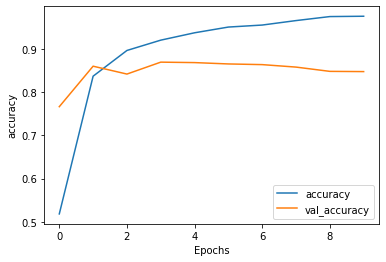

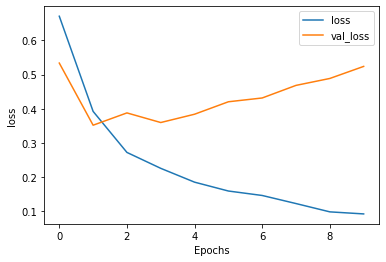

In [44]:
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

Let's look at some sample texts and see how the model is doing:

In [51]:
#Predict from book review:

sample_book = ("It's not that it was bad, it's just that I wish the tiger had eaten him so the story wouldn't exist.I read half of it, and felt really impatient the whole time, skipping whole pages, and then I realized that I didn't have to keep going, which is as spiritual a moment as I could hope to get from this book.")
predictions = sample_predict(sample_book, pad=True)
print(predictions)

[[-3.2595968]]


In [0]:
#What about a big review?:
sample_big = "I was extremely surprised by this book. Let me tell you why (it's a funny story):On the Danish cover it says Pi's Liv (Pi's Life),\
 but I hadn't noticed the apostrophe, so I thought it said Pis Liv (Piss Life) and I thought that was an interesting title at least, so perhaps I \
 should give it a go. So I did. And... what I read was not at all what I had expected (I thought it was a book about a boy in the slums or something).\
  It wasn't until I looked up the book in English I realized the title wasn't Piss Life. I was deceived for the longest time and, well, not only about this.\
  When I first read it I also thought it was based on a true story. I'm not sure why I thought that, I must have misread something (I vaguely recall\
   thinking the prologue was instead an introduction). It was a sad (and ehm, slightly humiliating) day when I discovered the truth lay elsewhere. I guess\
    your romantic beliefs must die someday, and that was the day for me.See, it's easier to believe in the world and be optimistic about it, when you also believe\
     that world capable of containing a boy and a tiger co-existing on a lifeboat for 7 months and surviving. The truth is this book probably changed my life, not \
     in any grand, extraordinary way. But with the small things, the small observations. Like how he was afraid to run out of paper, to document his days in the lifeboat,\
      and instead he ran out of ink. Like how he chose to embrace three religions, not just one. This book, and Pi especially, represent and embody a way of life that I admire.\
       It's not about believing in God, but about what it takes to believe in something, anything really. Yourself, the world, goodness, life, God.\
       If it seemed real enough for me to believe it had happened, perhaps the real world is indeed a place where it could happen. And that's what I want\
        to believe, even if real life might tell me otherwise."

In [53]:
predictions = sample_predict(sample_big, pad=True)
print(predictions)

[[4.392672]]


It's surprisingly accurate, even with a challenging review like that with many "false negative" words, it gets the overal positive message...